In [1]:
import os
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

import howfsc


In [2]:
# Import the defaults probes

# \!/ CHANGE IT IF YOU WANT TO GENERATE OTHER SINC PROBES \!/
modelpath = "C:/Users/ldelaye/Documents/Repos/corgihowfsc/corgihowfsc/model/probes"

probe0file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_cos.fits')
probe1file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinlr.fits')
probe2file = os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinud.fits')

sin0probe = fits.getdata(probe0file)
sin1probe = fits.getdata(probe1file)
sin2probe = fits.getdata(probe2file)

In [3]:
# The first sinc is the same

# Create the second sinc
sin1probe = np.zeros_like(sin0probe)
sin1probe[:, 1:] = sin0probe[:, :-1]

# Create the third sinc
sin2probe = np.zeros_like(sin0probe)
sin2probe[1:, 1:] = sin0probe[:-1, :-1]

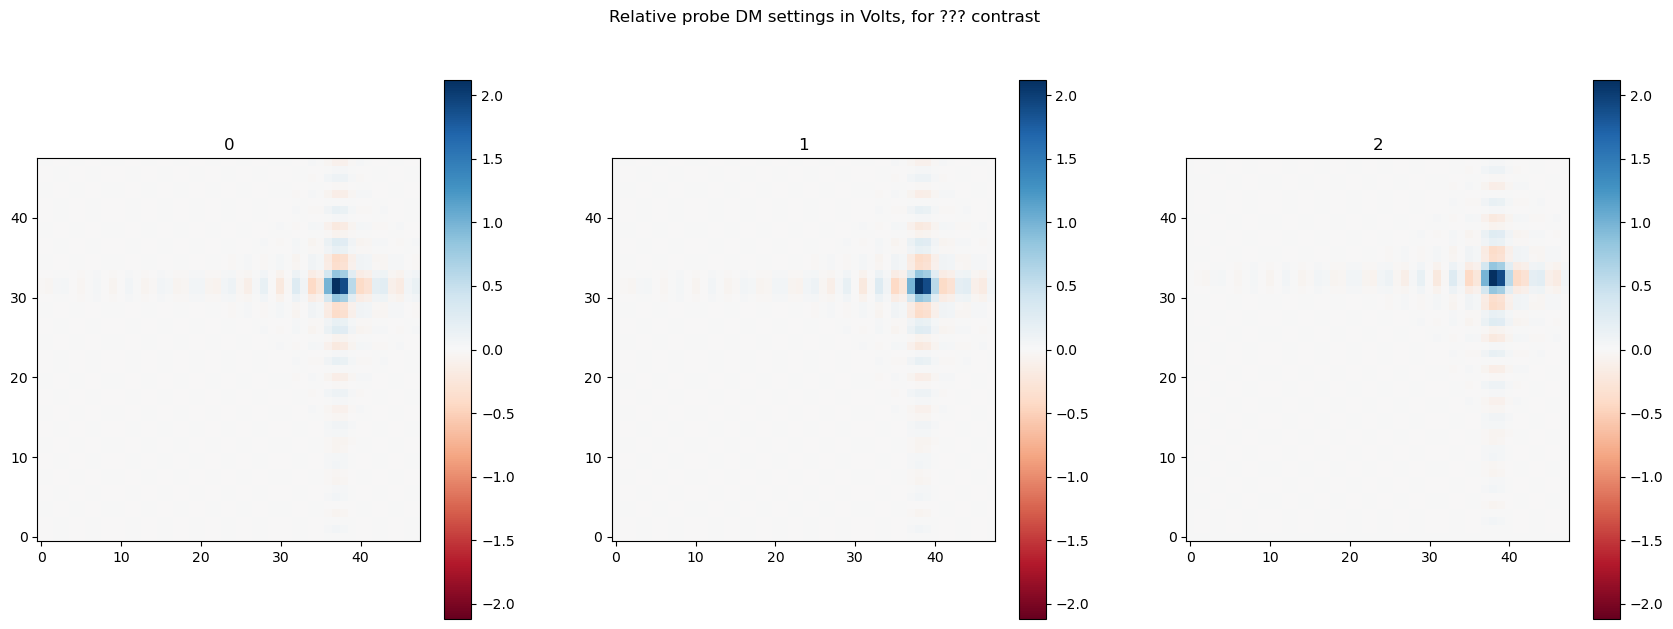

In [4]:
zeronorm = TwoSlopeNorm(vcenter=0, vmin=-np.max(sin0probe), vmax=np.max(sin0probe))

plt.figure(figsize=(21, 7))
plt.suptitle('Relative probe DM settings in Volts, for ??? contrast')

plt.subplot(1, 3, 1)
plt.imshow(sin0probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('0')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(sin1probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('1')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(sin2probe, cmap='RdBu', origin='lower', norm=zeronorm)
plt.title('2')
plt.colorbar()

In [5]:
# I change the name of the first sinc in case we move it for this pattern of probes
fits.writeto(os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinc.fits'), sin0probe, overwrite=True)
fits.writeto(os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinc_shifted_right.fits'), sin1probe, overwrite=True)
fits.writeto(os.path.join(modelpath, 'nfov_dm_dmrel_4_1.0e-05_sinc_shifted_diag_ur.fits'), sin2probe, overwrite=True)
